In [1]:
from hidden_state.utils import load_generated_result
import numpy as np

In [ ]:
data = load_generated_result('opt', 'trivia_qa')

Reading file:  1c12337b-fc62-4ccb-8417-dd53df0fa5c5.npy


In [3]:
np.mean([d['align']>0.5 for d in data])

0.527

In [4]:
data[0].keys()

dict_keys(['montecarlosequenceentropy', 'lexicalsimilarity', 'semanticentropy', 'maximumsequenceprobability', 'sar', 'align', 'inputs', 'target_texts', 'answer'])

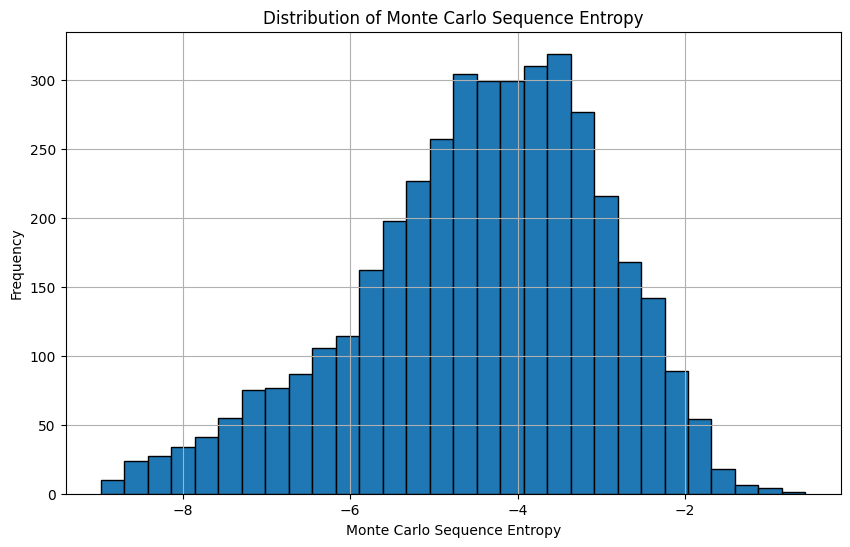

In [5]:
import matplotlib.pyplot as plt

# Extract the list of values
values = [d['sar'] for d in data]

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.hist(values, bins=30, edgecolor='black')
plt.title('Distribution of Monte Carlo Sequence Entropy')
plt.xlabel('Monte Carlo Sequence Entropy')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


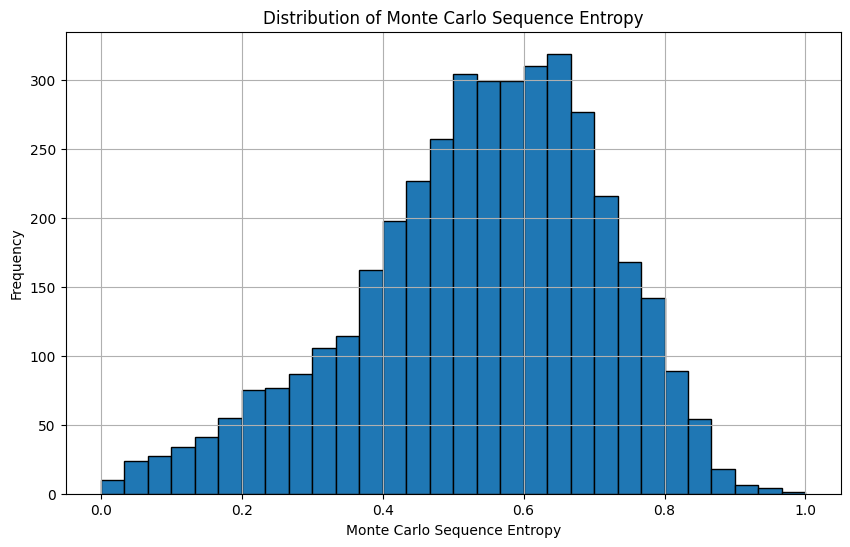

In [6]:
def min_max_normalization(data):
    """
    Normalize a list of numbers to the range [0, 1] using Min-Max Scaling.

    Parameters:
    data (list of float): The input list of numbers.

    Returns:
    list of float: The normalized list in the range [0, 1].
    """
    min_val = min(data)
    max_val = max(data)
    return [(x - min_val) / (max_val - min_val) if max_val != min_val else 0 for x in data]


import matplotlib.pyplot as plt

# Extract the list of values
values = min_max_normalization([d['sar'] for d in data])
# Plot the distribution
plt.figure(figsize=(10, 6))
plt.hist(values, bins=30, edgecolor='black')
plt.title('Distribution of Monte Carlo Sequence Entropy')
plt.xlabel('Monte Carlo Sequence Entropy')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


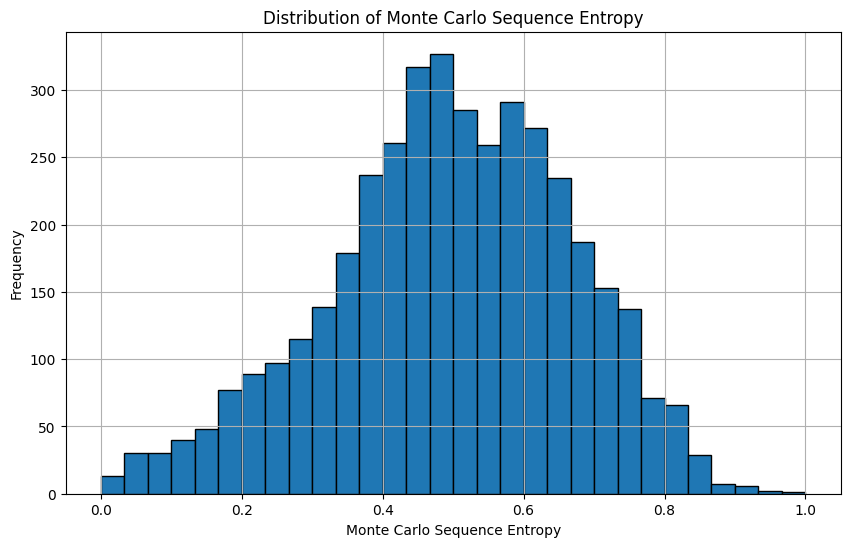

In [8]:
def custom_normalization(data):
    """
    Normalize a list of numbers such that:
    - The bottom 70% of the data is scaled to [0, 0.5].
    - The top 30% of the data is scaled to [0.5, 1].
    
    Parameters:
    data (list of float): The input list of numbers.

    Returns:
    list of float: The transformed list with values in the range [0, 1].
    """
    sorted_data = sorted(data)  # Sort the data to determine split
    n = len(data)
    split_index = int(n * 0.5)  # Find the index separating bottom 70% and top 30%

    # Split into two groups
    bottom_70 = sorted_data[:split_index]
    top_30 = sorted_data[split_index:]

    # Normalize bottom 70% to [0, 0.5]
    min_70, max_70 = min(bottom_70), max(bottom_70)
    bottom_70_scaled = [0.5 * (x - min_70) / (max_70 - min_70) if max_70 != min_70 else 0.25 for x in bottom_70]

    # Normalize top 30% to [0.5, 1]
    min_30, max_30 = min(top_30), max(top_30)
    top_30_scaled = [0.5 + 0.5 * (x - min_30) / (max_30 - min_30) if max_30 != min_30 else 0.75 for x in top_30]

    # Combine the results while maintaining original order
    normalized_dict = {v: s for v, s in zip(bottom_70 + top_30, bottom_70_scaled + top_30_scaled)}
    return [normalized_dict[x] for x in data]  # Return normalized values in original order

import matplotlib.pyplot as plt

# Extract the list of values
values = custom_normalization([d['sar'] for d in data])
# Plot the distribution
plt.figure(figsize=(10, 6))
plt.hist(values, bins=30, edgecolor='black')
plt.title('Distribution of Monte Carlo Sequence Entropy')
plt.xlabel('Monte Carlo Sequence Entropy')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

